# **Import Libraries/Dataset**

In [1]:
!pip install chart-studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 4.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
from sklearn.model_selection import *
from sklearn.feature_extraction.text import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from scipy.sparse import csr_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import *
from tensorflow import keras
import plotly.graph_objs as go
import pandas as pd
from chart_studio import plotly as py
  
# some more libraries to plot graph
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot

# **Data Visualization and Exploration**

### 10 rows printed for sanity check to identify all the features present in the dataset and to check if the target matches with them.

In [3]:
#To read data from data set 

donor_data = pd.read_csv("/kaggle/input/donors-choose-dataset/Preprocessed_DonorsChoose_dataset.csv")
donor_data.head(10)

,id,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,cleaned_titles,cleaned_essays,cleaned_summary,isdigit_summary
0,p253737,mrs,in,grades_prek_2,literacy_language,esl_literacy,0,0,154.60,23,educational support english learners home,students english learners working english seco...,students_need_opportunities_practice_beginning...,0
1,p258326,mr,fl,grades_6_8,history_civics_health_sports,civics_government_teamsports,7,1,299.00,1,wanted projector hungry learners,students arrive school eager learn polite gene...,students_need_projector_help_viewing_education...,0
2,p182444,ms,az,grades_6_8,health_sports,health_wellness_teamsports,1,0,516.85,22,soccer equipment awesome middle school students,true champions not always ones win guts mia ha...,students_need_shine_guards_athletic_socks_socc...,0
3,p246581,mrs,ky,grades_prek_2,literacy_language_math_science,literacy_mathematics,4,1,232.90,4,techie kindergarteners,work unique school filled esl english second l...,students_need_engage_reading_math_way_inspire_...,0
4,p104768,mrs,tx,grades_prek_2,math_science,mathematics,1,1,67.98,4,interactive math tools,second grade classroom next year made around 2...,students_need_hands_practice_mathematics_fun_p...,0
5,p154343,mrs,fl,grades_3_5,literacy_language_specialneeds,literature_writing_specialneeds,1,1,113.22,11,flexible seating mrs jarvis terrific third gra...,moving 2nd grade 3rd grade beginning next scho...,students_need_movement_successful_variety_stud...,0
6,p099819,mrs,ct,grades_6_8,literacy_language_specialneeds,literacy_specialneeds,1,1,159.99,3,chromebooks special education reading program,students dynamic energetic group middle school...,students_need_dependable_laptops_daily_classro...,0
7,p092424,ms,ga,grades_3_5,math_science,mathematics,7,1,229.00,4,21st century,not students struggle poverty also learning ma...,students_need_ipads_help_access_world_online_r...,0
8,p045029,mrs,sc,grades_prek_2,health_sports,health_wellness,28,1,241.98,6,targeting success class,students enthusiastic inquisitive learners k 6...,students_need_three_devices_three_management_l...,0
9,p001713,ms,nc,grades_prek_2,literacy_language,literacy_literature_writing,36,1,125.36,14,love reading pure pleasure,95 students free reduced lunch homeless despit...,students_need_great_books_use_independent_read...,0


## Univariate analysis on teacher_prefix, Price, State, with target variable.
(% of projects approved w.r.t teacher_prefix,price,state)

### **% of projects approved w.r.t teacher_prefix**

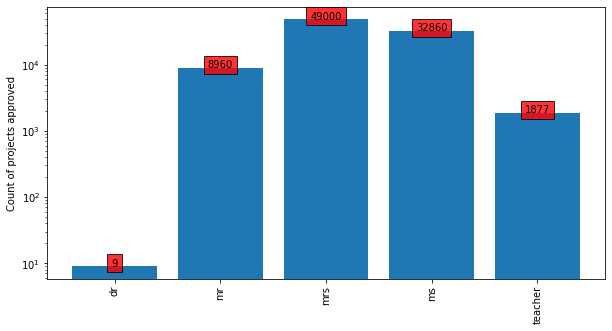

In [4]:
df = donor_data[donor_data.project_is_approved == 1].groupby('teacher_prefix').count()
df = df.reset_index().copy()
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.ylabel('Count of projects approved')
plt.bar(df['teacher_prefix'],df['project_is_approved'], log=True)

for i in range(len(df['teacher_prefix'])):
        plt.text(i,df['project_is_approved'][i],df['project_is_approved'][i], ha = 'center', bbox = dict(facecolor = 'red', alpha =.8))

### **Distribution of Teachers Prefix**

([<matplotlib.patches.Wedge at 0x7f5493513b10>,
 [Text(2.1999998976797124, 0.0006709763453133982, 'dr'),
  Text(2.098962322460949, 0.6590577887327796, 'mr'),
  Text(-1.4131998433002866, 1.6860801294410792, 'mrs'),
  Text(0.7129620949875407, -2.0812700572273117, 'ms'),
  Text(2.195551054273338, -0.1398412245342397, 'teacher')],
 [Text(1.699999920934323, 0.0005184817213785349, '0.010%'),
  Text(1.621925430992551, 0.5092719276571478, '9.665%'),
  Text(-1.0920180607320396, 1.302880100022652, '52.855%'),
  Text(0.550925255217645, -1.6082541351301953, '35.445%'),
  Text(1.6965621783021245, -0.1080591280491852, '2.025%')])

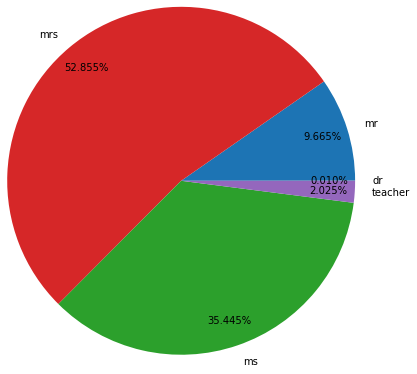

In [5]:
# colors
colors = ['#f7770f', '#1d74b4', '#d62728', '#2ca02c', '#9467bd']
# Pie Chart
plt.pie(df['project_is_approved'], colors=colors, labels=df['teacher_prefix'],
        autopct='%1.3f%%', pctdistance=0.85, radius=2)

### **% of projects approved w.r.t state**

In [6]:
df = donor_data[donor_data.project_is_approved == 1].groupby('school_state').count()
df = df.reset_index().copy()
df['school_state'] = df['school_state'].str.upper()
locations = df['school_state'].tolist()

In [7]:
df = donor_data[donor_data.project_is_approved == 1].groupby('school_state').count()
df = df.reset_index().copy()

# To establish connection
init_notebook_mode(connected = True)
  
# type defined is choropleth to
# plot geographical plots
data = dict(type = 'choropleth',
  
            # locations
            locations = locations,
              
            # States of USA
            locationmode = 'USA-states',
              
            # colorscale can be added as per requirement
            colorscale = 'aggrnyl',
              
            # text can be given anything you like
            z = df['project_is_approved'].tolist(),
            colorbar = {'title': 'Rate of projects approved'})
              
layout = dict(geo ={'scope': 'usa'})

# passing data dictionary as a list 
choromap = go.Figure(data = [data], layout = layout)

choromap.update_layout(height=1000, margin=dict(t=0, r=0, l=0, b=0))
  
# plotting graph
iplot(choromap)

choromap.show(renderer="colab") 

### **% of projects approved w.r.t price**

In [8]:
# Average amount of a single funded proposal in states

mean_price = donor_data[donor_data.project_is_approved == 1].groupby('school_state').count()
mean_price = mean_price.reset_index().copy()

In [9]:
# To establish connection
init_notebook_mode(connected = True)
  
# type defined is choropleth to
# plot geographical plots
data = dict(type = 'choropleth',
  
            # locations
            locations = locations,
              
            # States of USA
            locationmode = 'USA-states',
              
            # colorscale can be added as per requirement
            colorscale = 'redor',
              
            # text can be given anything you like
            z = mean_price['price'],
            colorbar = {'title': 'USD'})
              
layout = dict(geo ={'scope': 'usa'})

# passing data dictionary as a list 
choromap = go.Figure(data = [data], layout = layout)

choromap.update_layout(height=1000, margin=dict(t=0, r=0,  l=0))
  
# plotting graph
iplot(choromap)


choromap.show(renderer="colab") 


array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

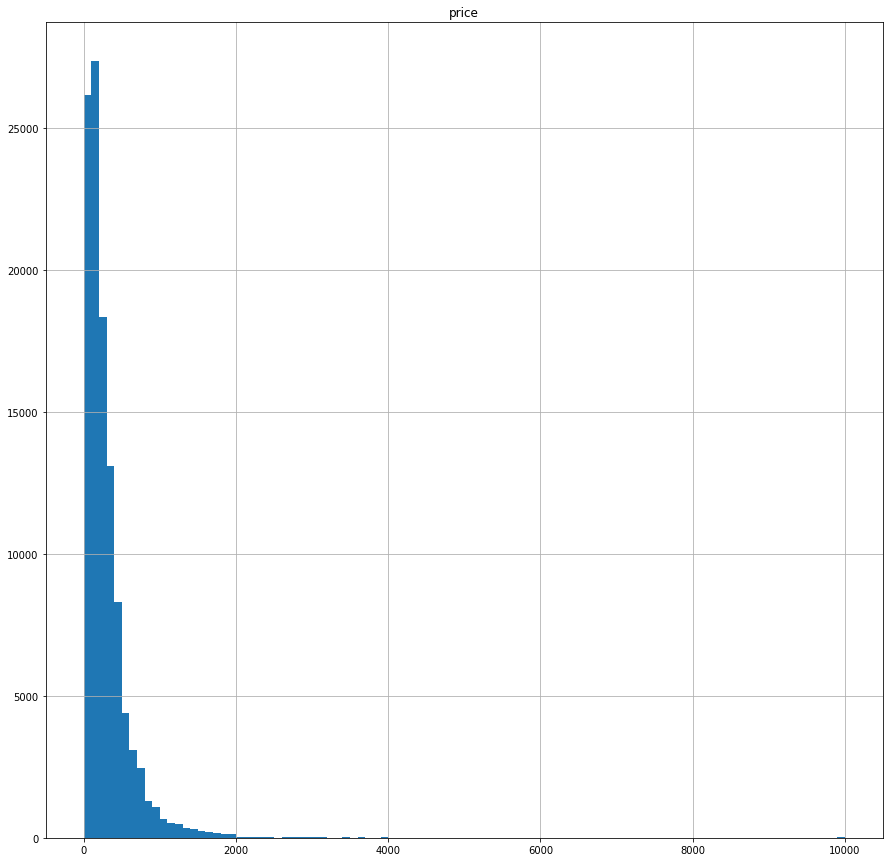

In [10]:
# Statistic of amount of proposal's request fund

donor_data.hist(column='price', bins=100, figsize = (15,15))

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

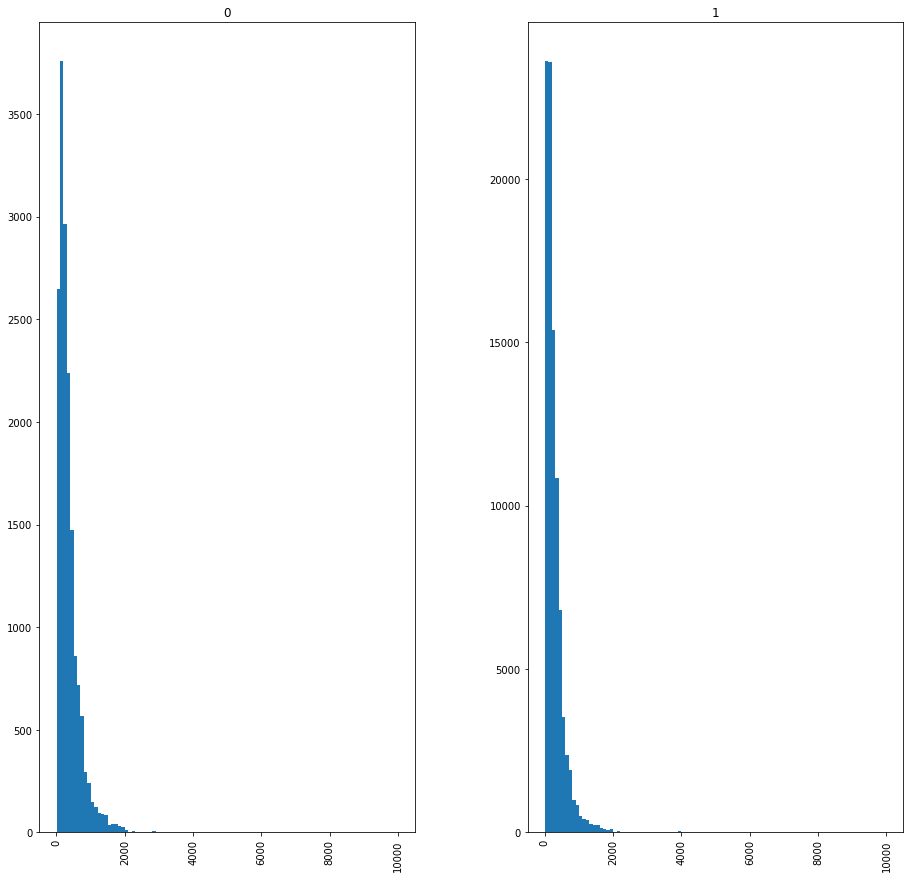

In [11]:
# Funding Amount v/s Rate of Reject

donor_data.hist(column='price', bins=100, by=donor_data['project_is_approved'], figsize = (15,15))

### Class label count.

In [12]:
# To get each class label count

donor_data['project_is_approved'].value_counts()

1    92706
0    16542
Name: project_is_approved, dtype: int64

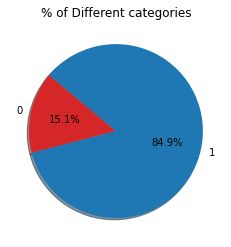

In [13]:
# Pie chart showing each class (% of data distribution)

x = donor_data['project_is_approved'].groupby(donor_data['project_is_approved']).count().index
projects = donor_data['project_is_approved'].groupby(donor_data['project_is_approved']).count().values
colors = ["#d62728","#1f77b4"]
plt.pie(projects, labels=x,  colors=colors , autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("% of Different categories")
plt.show()

Here we can see that 84.9% of the projects were approved while only 15.1% of the projects were not. Therefore, data is not balanced.

# **Data Preparation**

In [14]:
# Identify NULL or Missing Values based on column

percent_null = donor_data.isnull().sum() * 100 / len(donor_data)
null_value_df = pd.DataFrame({'Percentage_missing': percent_null})
# missing_value_df.sort_values('percent_missing', inplace=True)
z = null_value_df[null_value_df['Percentage_missing'] > 0]
if len(z.index) > 0:
  print (z)
else:
  print("No null values")

                Percentage_missing
cleaned_titles             0.03936


In [15]:
# To drop all null or missing values

donor_data_na = donor_data.dropna()
print(donor_data_na)

             id teacher_prefix school_state project_grade_category  \
0       p253737            mrs           in          grades_prek_2   
1       p258326             mr           fl             grades_6_8   
2       p182444             ms           az             grades_6_8   
3       p246581            mrs           ky          grades_prek_2   
4       p104768            mrs           tx          grades_prek_2   
...         ...            ...          ...                    ...   
109243  p048540             mr           mo          grades_prek_2   
109244  p166281             ms           nj          grades_prek_2   
109245  p155633            mrs           nj          grades_prek_2   
109246  p206114            mrs           ny             grades_3_5   
109247  p191189             ms           va             grades_6_8   

            project_subject_categories   project_subject_subcategories  \
0                    literacy_language                    esl_literacy   
1         h

In [16]:
# Normalised numeric columns

df_num = donor_data_na.select_dtypes(include='number')
df_norm = (df_num - df_num.min()) / (df_num.max() - df_num.min())
donor_data_na[df_norm.columns] = df_norm
donor_data_na

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,cleaned_titles,cleaned_essays,cleaned_summary,isdigit_summary
0,p253737,mrs,in,grades_prek_2,literacy_language,esl_literacy,0.000000,0.0,0.015397,0.023681,educational support english learners home,students english learners working english seco...,students_need_opportunities_practice_beginning...,0.0
1,p258326,mr,fl,grades_6_8,history_civics_health_sports,civics_government_teamsports,0.015521,1.0,0.029839,0.000000,wanted projector hungry learners,students arrive school eager learn polite gene...,students_need_projector_help_viewing_education...,0.0
2,p182444,ms,az,grades_6_8,health_sports,health_wellness_teamsports,0.002217,0.0,0.051628,0.022605,soccer equipment awesome middle school students,true champions not always ones win guts mia ha...,students_need_shine_guards_athletic_socks_socc...,0.0
3,p246581,mrs,ky,grades_prek_2,literacy_language_math_science,literacy_mathematics,0.008869,1.0,0.023228,0.003229,techie kindergarteners,work unique school filled esl english second l...,students_need_engage_reading_math_way_inspire_...,0.0
4,p104768,mrs,tx,grades_prek_2,math_science,mathematics,0.002217,1.0,0.006733,0.003229,interactive math tools,second grade classroom next year made around 2...,students_need_hands_practice_mathematics_fun_p...,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109243,p048540,mr,mo,grades_prek_2,literacy_language_math_science,literature_writing_mathematics,0.000000,1.0,0.005933,0.007535,privacy shields help promote independent thinking,welcome mr ramos 2nd grade classroom title 1 s...,students_need_privacy_partitions_help_focus_be...,0.0
109244,p166281,ms,nj,grades_prek_2,literacy_language_math_science,literacy_mathematics,0.000000,1.0,0.084580,0.003229,technology classroom,every morning start day core values lead solel...,students_need_two_ipad_protective_cases_enhanc...,0.0
109245,p155633,mrs,nj,grades_prek_2,literacy_language_math_science,literacy_mathematics,0.006652,1.0,0.023934,0.003229,2016 2017 beginning year basics,great group sharing caring students multi grad...,students_need_giant_comfy_pillows_order_help_r...,0.0
109246,p206114,mrs,ny,grades_3_5,health_sports_specialneeds,health_wellness_specialneeds,0.000000,1.0,0.007240,0.016146,flexible seating inclusive classroom,students live small rural community classroom ...,students_need_flexible_seating_options_bean_ba...,0.0


In [17]:
# Changed data type of boolean columns

donor_data_na = donor_data_na.astype({"isdigit_summary": bool, "project_is_approved": bool})

### **CASE: 1 - Dataset split into training and test sets. (Train:80, Test:20)**
 Train = 80 % Test = 20% [ x_train1,y_train1] = 80% ; [ x_test1,y_test1] = 20% ;

In [18]:
feature_cols = donor_data_na.drop(['project_is_approved'], axis = 1).columns
x = donor_data_na[feature_cols]
y = donor_data_na['project_is_approved']
y.sample(5)

38241     True
74319     True
107279    True
102341    True
83738     True
Name: project_is_approved, dtype: bool

In [19]:
X_train_case1, X_test_case1, y_train_case1, y_test_case1 = train_test_split(x, y, test_size = 0.2)

## **Encoding**
### **Encoding Subject Categories column**

In [20]:
vectorizer_sub = CountVectorizer( lowercase=False, binary=True)
vectorizer_sub.fit(X_train_case1['project_subject_categories'].values)

x_train_case1_categories = vectorizer_sub.transform(X_train_case1['project_subject_categories'].values)
x_test_case1_categories  = vectorizer_sub.transform(X_test_case1['project_subject_categories'].values)

print(vectorizer_sub.get_feature_names_out())
print("Shape of matrix after one hot encoding -> categories: X_train_case1: ",x_train_case1_categories.shape)
print("Shape of matrix after one hot encoding -> categories: X_test_Case1 : ",x_test_case1_categories.shape)

['appliedlearning' 'appliedlearning_health_sports'
 'appliedlearning_history_civics' 'appliedlearning_literacy_language'
 'appliedlearning_math_science' 'appliedlearning_music_arts'
 'appliedlearning_specialneeds' 'appliedlearning_warmth_care_hunger'
 'health_sports' 'health_sports_appliedlearning'
 'health_sports_history_civics' 'health_sports_literacy_language'
 'health_sports_math_science' 'health_sports_music_arts'
 'health_sports_specialneeds' 'health_sports_warmth_care_hunger'
 'history_civics' 'history_civics_appliedlearning'
 'history_civics_health_sports' 'history_civics_literacy_language'
 'history_civics_math_science' 'history_civics_music_arts'
 'history_civics_specialneeds' 'literacy_language'
 'literacy_language_appliedlearning' 'literacy_language_health_sports'
 'literacy_language_history_civics' 'literacy_language_math_science'
 'literacy_language_music_arts' 'literacy_language_specialneeds'
 'literacy_language_warmth_care_hunger' 'math_science'
 'math_science_appliedle

### **Encoding project_subject_subcategories**

In [21]:
vectorizer_sub = CountVectorizer( lowercase=False, binary=True)

vectorizer_sub.fit(X_train_case1['project_subject_subcategories'].values)

x_train_case1_sub_categories = vectorizer_sub.transform(X_train_case1['project_subject_subcategories'].values)
x_test_case1_sub_categories  = vectorizer_sub.transform(X_test_case1['project_subject_subcategories'].values)


print(vectorizer_sub.get_feature_names())

print("Shape of matrix after one hot encoding -> sub_categories: X_train_case1: ",x_train_case1_sub_categories.shape)
print("Shape of matrix after one hot encoding -> sub_categories: X_test_Case1 : ",x_test_case1_sub_categories.shape)

['appliedsciences', 'appliedsciences_charactereducation', 'appliedsciences_civics_government', 'appliedsciences_college_careerprep', 'appliedsciences_communityservice', 'appliedsciences_earlydevelopment', 'appliedsciences_economics', 'appliedsciences_environmentalscience', 'appliedsciences_esl', 'appliedsciences_extracurricular', 'appliedsciences_financialliteracy', 'appliedsciences_foreignlanguages', 'appliedsciences_gym_fitness', 'appliedsciences_health_lifescience', 'appliedsciences_health_wellness', 'appliedsciences_history_geography', 'appliedsciences_literacy', 'appliedsciences_literature_writing', 'appliedsciences_mathematics', 'appliedsciences_music', 'appliedsciences_nutritioneducation', 'appliedsciences_other', 'appliedsciences_parentinvolvement', 'appliedsciences_performingarts', 'appliedsciences_socialsciences', 'appliedsciences_specialneeds', 'appliedsciences_teamsports', 'appliedsciences_visualarts', 'appliedsciences_warmth_care_hunger', 'charactereducation', 'charactered

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



### **Encoding School State**

In [22]:
my_counter = Counter()
for state in donor_data_na['school_state'].values:
    my_counter.update(state.split())
school_state_cat_dict = dict(my_counter)
sorted_school_state_cat_dict = dict(sorted(school_state_cat_dict.items(), key=lambda kv: kv[1]))
from scipy import sparse 
statelist=list(donor_data_na['school_state'].values)
vectorizer_state = CountVectorizer( lowercase=False, binary=True)

vectorizer_state.fit(X_train_case1['school_state'])

x_train_case1_school_state = vectorizer_state.transform(X_train_case1['school_state'].values)
x_test_case1_school_state  = vectorizer_state.transform(X_test_case1['school_state'].values)

print(vectorizer_state.get_feature_names())

print("Shape of matrix after one hot encoding -> school_state: x_train: ",x_train_case1_school_state.shape)
print("Shape of matrix after one hot encoding -> school_state: x_test : ",x_test_case1_school_state.shape)

['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
Shape of matrix after one hot encoding -> school_state: x_train:  (87364, 51)
Shape of matrix after one hot encoding -> school_state: x_test :  (21841, 51)


### **Encoding Teacher Prefix**

In [23]:
my_counter = Counter()
for teacher_prefix in donor_data_na['teacher_prefix'].values:
    teacher_prefix = str(teacher_prefix).lower().replace('.','').strip()
    
    my_counter.update(teacher_prefix.split())
teacher_prefix_cat_dict = dict(my_counter)
sorted_teacher_prefix_cat_dict = dict(sorted(teacher_prefix_cat_dict.items(), key=lambda kv: kv[1]))

In [24]:
sorted_teacher_prefix_cat_dict.keys()

dict_keys(['dr', 'teacher', 'mr', 'ms', 'mrs'])

In [25]:
vectorizer_prefix = CountVectorizer(lowercase=False, binary=True)

vectorizer_prefix.fit(X_train_case1['teacher_prefix'].values)

x_train_case1_prefix = vectorizer_prefix.transform(X_train_case1['teacher_prefix'].values)
x_test_case1_prefix  = vectorizer_prefix.transform(X_test_case1['teacher_prefix'].values)

print(vectorizer_prefix.get_feature_names())

print("Shape of matrix after one hot encoding -> prefix: x_train: ",x_train_case1_prefix.shape)
print("Shape of matrix after one hot encoding -> prefix: x_test : ",x_test_case1_prefix.shape)

['dr', 'mr', 'mrs', 'ms', 'teacher']
Shape of matrix after one hot encoding -> prefix: x_train:  (87364, 5)
Shape of matrix after one hot encoding -> prefix: x_test :  (21841, 5)


### **Encoding Grade Category**

In [26]:
vectorizer_grade = CountVectorizer(lowercase=False, binary=True)

vectorizer_grade.fit(X_train_case1['project_grade_category'].values)

x_train_case1_grade_category = vectorizer_grade.transform(X_train_case1['project_grade_category'].values)
x_test_case1_grade_category  = vectorizer_grade.transform(X_test_case1['project_grade_category'].values)

print(vectorizer_grade.get_feature_names())

print("Shape of matrix after one hot encoding -> project_grade: x_train : ",x_train_case1_grade_category.shape)
print("Shape of matrix after one hot encoding -> project_grade: x_test  : ",x_test_case1_grade_category.shape)

['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']
Shape of matrix after one hot encoding -> project_grade: x_train :  (87364, 4)
Shape of matrix after one hot encoding -> project_grade: x_test  :  (21841, 4)


### **Encoding Price**

In [27]:
normalizer = Normalizer()
normalizer.fit(X_train_case1['price'].values.reshape(1,-1))
x_train_case1_price_normalized = normalizer.transform(X_train_case1['price'].values.reshape(1, -1)).reshape(-1,1)
normalizer.fit(X_test_case1['price'].values.reshape(1,-1))
x_test_case1_price_normalized  = normalizer.transform(X_test_case1['price'].values.reshape(1, -1)).reshape(-1,1)
x_train_case1_price_normalized

array([[0.00018243],
       [0.00247168],
       [0.00078538],
       ...,
       [0.00072685],
       [0.00380212],
       [0.00045737]])

### **Encoding Previous Projects Number**

In [28]:
teacher_previous_proj_normalizer = Normalizer()
teacher_previous_proj_normalizer.fit(X_train_case1['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
x_train_case1_teacher_previous_proj_normalized = teacher_previous_proj_normalizer.transform(X_train_case1['teacher_number_of_previously_posted_projects'].values.reshape(1,- 1)).reshape(-1,1)
teacher_previous_proj_normalizer.fit(X_test_case1['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
x_test_case1_teacher_previous_proj_normalized  = teacher_previous_proj_normalizer.transform(X_test_case1['teacher_number_of_previously_posted_projects'].values.reshape(1,- 1)).reshape(-1,1)


### **Encoding Quantity**

In [29]:
normalizer = Normalizer()

normalizer.fit(X_train_case1['quantity'].values.reshape(1,-1)) 
x_train_case1_quantity_normalized = normalizer.transform(X_train_case1['quantity'].values.reshape(1, -1)).reshape(-1,1)
normalizer.fit(X_test_case1['quantity'].values.reshape(1,-1)) 
x_test_case1_quantity_normalized  = normalizer.transform(X_test_case1['quantity'].values.reshape(1, -1)).reshape(-1,1)
x_train_case1_quantity_normalized


array([[0.0004417 ],
       [0.00033128],
       [0.02164333],
       ...,
       [0.00099383],
       [0.0008834 ],
       [0.0013251 ]])

## **BoW Vectorization of Cleaned_Titles and Cleaned Essays**

In [30]:
# Concatenate all features in X_train_case1 cleaned titles

vect = CountVectorizer()
vect.fit(X_train_case1['cleaned_titles'])
X_train_BoW = vect.get_feature_names()
len(X_train_BoW)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



15046

In [31]:
# Append values from cleaned_essays

vect = CountVectorizer()
vect.fit(X_train_case1['cleaned_essays'])
X_train_BoW.extend(vect.get_feature_names())
np.unique(X_train_BoW)
len(X_train_BoW)

66037

In [32]:
# Concatenate all features in X_test_case1 cleaned titles

vect = CountVectorizer()
vect.fit(X_test_case1['cleaned_titles'])
X_test_BoW = vect.get_feature_names()
len(X_test_BoW)

7939

In [33]:
# Append values from cleaned_essays

vect = CountVectorizer()
vect.fit(X_test_case1['cleaned_essays'])
X_test_BoW.extend(vect.get_feature_names())
np.unique(X_test_BoW)
len(X_test_BoW)

38025

In [34]:
# Most used terms in cleaned titles

max_feature_length = 10
top_words = []

bow_transformer = CountVectorizer(max_features=max_feature_length,ngram_range=(1,1)).fit(donor_data_na.loc[:,'cleaned_titles'])
bow = bow_transformer.transform([' '.join(donor_data_na.loc[:,'cleaned_titles'].values)])#This joins all the words in all the rows 
word_list = bow_transformer.get_feature_names()
count_list = bow.toarray().sum(axis=0) 
top_counts = pd.DataFrame(zip(word_list,count_list),columns=['term','count',])
top_counts.sort_values('count',axis=0,inplace=True, ascending=False)
top_counts

,term,count
3,learning,9315
9,technology,5871
1,classroom,5674
8,students,5115
6,reading,4850
2,help,4419
0,books,4131
7,seating,4007
5,need,3697
4,math,3299


In [35]:
# Most used terms in cleaned essays

max_feature_length = 10
top_words = []

bow_transformer = CountVectorizer(max_features=max_feature_length,ngram_range=(1,1)).fit(donor_data_na.loc[:,'cleaned_essays'])
bow_essay = bow_transformer.transform([' '.join(donor_data_na.loc[:,'cleaned_essays'].values)])#This joins all the words in all the rows 
word_list = bow_transformer.get_feature_names()
count_list = bow_essay.toarray().sum(axis=0) 
top_counts = pd.DataFrame(zip(word_list,count_list),columns=['term','count',])
top_counts.sort_values('count',axis=0,inplace=True, ascending=False)
top_counts

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,term,count
8,students,790864
7,school,253799
3,learning,177495
0,classroom,169644
6,not,131423
2,learn,126098
1,help,122608
4,many,105414
5,need,92898
9,work,92161


### **BoW Vectorization of Cleaned_Essays**

In [36]:
vectorizer_essay_bow_bigram = CountVectorizer(ngram_range=(2,2),min_df=10,max_features=5000)

vectorizer_essay_bow_bigram.fit(X_train_case1['cleaned_essays'])

x_train_case1_essays_bow_bigram = vectorizer_essay_bow_bigram.transform(X_train_case1['cleaned_essays'])
x_test_case1_essays_bow_bigram  = vectorizer_essay_bow_bigram.transform(X_test_case1['cleaned_essays'])

print("Shape of matrix after BOW -> Essays: x_train: ",x_train_case1_essays_bow_bigram.shape)
print("Shape of matrix after BOW -> Essays: x_test : ",x_test_case1_essays_bow_bigram.shape)

Shape of matrix after BOW -> Essays: x_train:  (87364, 5000)
Shape of matrix after BOW -> Essays: x_test :  (21841, 5000)


### **BoW Vectorization of Cleaned_Titles**

In [37]:
vectorizer_titles_bow_bigram = CountVectorizer(ngram_range=(2,2),min_df=10,max_features=5000)

vectorizer_titles_bow_bigram.fit(X_train_case1['cleaned_titles'])

x_train_case1_titles_bow_bigram = vectorizer_essay_bow_bigram.transform(X_train_case1['cleaned_titles'])
x_test_case1_titles_bow_bigram  = vectorizer_essay_bow_bigram.transform(X_test_case1['cleaned_titles'])

print("Shape of matrix after BOW -> Titles: x_train: ",x_train_case1_titles_bow_bigram.shape)
print("Shape of matrix after BOW -> Titles: x_test : ",x_test_case1_titles_bow_bigram.shape)

Shape of matrix after BOW -> Titles: x_train:  (87364, 5000)
Shape of matrix after BOW -> Titles: x_test :  (21841, 5000)


### Concatenate all features and named it as X_train_BoW and X_Test_BoW

In [38]:
X_train_BoW_merge = hstack((x_train_case1_essays_bow_bigram, x_train_case1_titles_bow_bigram, x_train_case1_categories, x_train_case1_sub_categories, x_train_case1_school_state, x_train_case1_prefix, x_train_case1_grade_category, x_train_case1_price_normalized, x_train_case1_quantity_normalized, x_train_case1_teacher_previous_proj_normalized))
X_test_BoW_merge  = hstack((x_test_case1_essays_bow_bigram, x_test_case1_titles_bow_bigram, x_test_case1_categories, x_test_case1_sub_categories, x_test_case1_school_state, x_test_case1_prefix,x_test_case1_grade_category, x_test_case1_price_normalized, x_test_case1_quantity_normalized, x_test_case1_teacher_previous_proj_normalized))

print("Type -> One Hot -> x_train: ",type(X_train_BoW_merge))
print("Type -> One Hot -> x_test : ",type(X_test_BoW_merge))
print("\n")
print("Shape -> One Hot -> x_train: ",X_train_BoW_merge.shape)
print("Shape -> One Hot -> x_test : ",X_test_BoW_merge.shape)

Type -> One Hot -> x_train:  <class 'scipy.sparse.coo.coo_matrix'>
Type -> One Hot -> x_test :  <class 'scipy.sparse.coo.coo_matrix'>


Shape -> One Hot -> x_train:  (87364, 10508)
Shape -> One Hot -> x_test :  (21841, 10508)


### **CASE: 2 - Dataset split into training and test sets. (Train:80, Test:20)**
 Train = 80 % Test = 20% [ x_train1,y_train1] = 80% ; [ x_test1,y_test1] = 20% ;

In [39]:
X_train_case2, X_test_case2, y_train_case2, y_test_case2 = train_test_split(x, y, test_size = 0.2)

### Encoding Subject Categories

In [40]:
vectorizer_sub = CountVectorizer( lowercase=False, binary=True)
vectorizer_sub.fit(X_train_case2['project_subject_categories'].values)

x_train_case2_categories = vectorizer_sub.transform(X_train_case2['project_subject_categories'].values)
x_test_case2_categories  = vectorizer_sub.transform(X_test_case2['project_subject_categories'].values)

print(vectorizer_sub.get_feature_names())
print("Shape of matrix after one hot encoding -> categories: X_train_case1: ",x_train_case2_categories.shape)
print("Shape of matrix after one hot encoding -> categories: X_test_Case1 : ",x_test_case2_categories.shape)

['appliedlearning', 'appliedlearning_health_sports', 'appliedlearning_history_civics', 'appliedlearning_literacy_language', 'appliedlearning_math_science', 'appliedlearning_music_arts', 'appliedlearning_specialneeds', 'appliedlearning_warmth_care_hunger', 'health_sports', 'health_sports_appliedlearning', 'health_sports_history_civics', 'health_sports_literacy_language', 'health_sports_math_science', 'health_sports_music_arts', 'health_sports_specialneeds', 'health_sports_warmth_care_hunger', 'history_civics', 'history_civics_appliedlearning', 'history_civics_health_sports', 'history_civics_literacy_language', 'history_civics_math_science', 'history_civics_music_arts', 'history_civics_specialneeds', 'literacy_language', 'literacy_language_appliedlearning', 'literacy_language_health_sports', 'literacy_language_history_civics', 'literacy_language_math_science', 'literacy_language_music_arts', 'literacy_language_specialneeds', 'literacy_language_warmth_care_hunger', 'math_science', 'math_s

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



### Encoding Subject Sub-Categories

In [41]:
vectorizer_sub = CountVectorizer( lowercase=False, binary=True)
vectorizer_sub.fit(X_train_case2['project_subject_subcategories'].values)
x_train_case2_sub_categories = vectorizer_sub.transform(X_train_case2['project_subject_subcategories'].values)
x_test_case2_sub_categories  = vectorizer_sub.transform(X_test_case2['project_subject_subcategories'].values)

print(vectorizer_sub.get_feature_names())

print("Shape of matrix after one hot encoding -> sub_categories: X_train_case1: ",x_train_case2_sub_categories.shape)
print("Shape of matrix after one hot encoding -> sub_categories: X_test_Case1 : ",x_test_case2_sub_categories.shape)

['appliedsciences', 'appliedsciences_charactereducation', 'appliedsciences_civics_government', 'appliedsciences_college_careerprep', 'appliedsciences_communityservice', 'appliedsciences_earlydevelopment', 'appliedsciences_economics', 'appliedsciences_environmentalscience', 'appliedsciences_esl', 'appliedsciences_extracurricular', 'appliedsciences_financialliteracy', 'appliedsciences_foreignlanguages', 'appliedsciences_gym_fitness', 'appliedsciences_health_lifescience', 'appliedsciences_health_wellness', 'appliedsciences_history_geography', 'appliedsciences_literacy', 'appliedsciences_literature_writing', 'appliedsciences_mathematics', 'appliedsciences_music', 'appliedsciences_nutritioneducation', 'appliedsciences_other', 'appliedsciences_parentinvolvement', 'appliedsciences_performingarts', 'appliedsciences_socialsciences', 'appliedsciences_specialneeds', 'appliedsciences_teamsports', 'appliedsciences_visualarts', 'appliedsciences_warmth_care_hunger', 'charactereducation', 'charactered

**CASE 2 : ENCODING SCHOOL STATE**

In [42]:
vectorizer_state = CountVectorizer( lowercase=False, binary=True)
vectorizer_state.fit(X_train_case2['school_state'])

x_train_case2_school_state = vectorizer_state.transform(X_train_case2['school_state'].values)
x_test_case2_school_state  = vectorizer_state.transform(X_test_case2['school_state'].values)

print(vectorizer_state.get_feature_names())

print("Shape of matrix after one hot encoding -> school_state: x_train: ",x_train_case2_school_state.shape)
print("Shape of matrix after one hot encoding -> school_state: x_test : ",x_test_case2_school_state.shape)

['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
Shape of matrix after one hot encoding -> school_state: x_train:  (87364, 51)
Shape of matrix after one hot encoding -> school_state: x_test :  (21841, 51)


**CASE 2 : ENCODING TEACHER PREFIX**

In [43]:
vectorizer_prefix = CountVectorizer(lowercase=False, binary=True)

vectorizer_prefix.fit(X_train_case2['teacher_prefix'].values)

x_train_case2_prefix = vectorizer_prefix.transform(X_train_case2['teacher_prefix'].values)
x_test_case2_prefix  = vectorizer_prefix.transform(X_test_case2['teacher_prefix'].values)

print(vectorizer_prefix.get_feature_names())

print("Shape of matrix after one hot encoding -> prefix: x_train: ",x_train_case2_prefix.shape)
print("Shape of matrix after one hot encoding -> prefix: x_test : ",x_test_case2_prefix.shape)

['dr', 'mr', 'mrs', 'ms', 'teacher']
Shape of matrix after one hot encoding -> prefix: x_train:  (87364, 5)
Shape of matrix after one hot encoding -> prefix: x_test :  (21841, 5)


**CASE 2 : ENCODING GRADE CATEGORY**

In [44]:
vectorizer_grade = CountVectorizer(lowercase=False, binary=True)

vectorizer_grade.fit(X_train_case2['project_grade_category'].values)

x_train_case2_grade_category = vectorizer_grade.transform(X_train_case2['project_grade_category'].values)
x_test_case2_grade_category  = vectorizer_grade.transform(X_test_case2['project_grade_category'].values)

print(vectorizer_grade.get_feature_names())

print("Shape of matrix after one hot encoding -> project_grade: x_train : ",x_train_case2_grade_category.shape)
print("Shape of matrix after one hot encoding -> project_grade: x_test  : ",x_test_case2_grade_category.shape)


['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']
Shape of matrix after one hot encoding -> project_grade: x_train :  (87364, 4)
Shape of matrix after one hot encoding -> project_grade: x_test  :  (21841, 4)


**CASE 2 : ENCODING PRICE**

In [45]:
normalizer = Normalizer()
normalizer.fit(X_train_case2['price'].values.reshape(1,-1))
x_train_case2_price_normalized = normalizer.transform(X_train_case2['price'].values.reshape(1, -1)).reshape(-1,1)
normalizer.fit(X_test_case2['price'].values.reshape(1,-1))
x_test_case2_price_normalized  = normalizer.transform(X_test_case2['price'].values.reshape(1, -1)).reshape(-1,1)
x_train_case2_price_normalized

array([[1.40789846e-03],
       [7.07142313e-04],
       [1.21495014e-03],
       ...,
       [8.42399873e-05],
       [5.61293762e-03],
       [2.15952867e-03]])

**CASE 2 : ENCODING PREVIOUS PROJECTS**

In [46]:
teacher_previous_proj_normalizer = Normalizer()
teacher_previous_proj_normalizer.fit(X_train_case2['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
x_train_case2_teacher_previous_proj_normalized = teacher_previous_proj_normalizer.transform(X_train_case2['teacher_number_of_previously_posted_projects'].values.reshape(1,- 1)).reshape(-1,1)
teacher_previous_proj_normalizer.fit(X_test_case2['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
x_test_case2_teacher_previous_proj_normalized  = teacher_previous_proj_normalizer.transform(X_test_case2['teacher_number_of_previously_posted_projects'].values.reshape(1,- 1)).reshape(-1,1)


**CASE 2 : ENCODING QUANTITY**

In [47]:
normalizer = Normalizer()

normalizer.fit(X_train_case2['quantity'].values.reshape(1,-1)) 
x_train_case2_quantity_normalized = normalizer.transform(X_train_case2['quantity'].values.reshape(1, -1)).reshape(-1,1)
normalizer.fit(X_test_case2['quantity'].values.reshape(1,-1)) 
x_test_case2_quantity_normalized  = normalizer.transform(X_test_case2['quantity'].values.reshape(1, -1)).reshape(-1,1)
x_train_case2_quantity_normalized


array([[0.00077097],
       [0.00066083],
       [0.00044056],
       ...,
       [0.00209264],
       [0.0014318 ],
       [0.00220278]])

**CASE 2 : TF-IDF Cleaned ESSAYS**

In [48]:
# TF-IDF on train set of cleaned titles

vectorizer_essay_tfidf_bigram = TfidfVectorizer(ngram_range=(2,2),min_df=10,max_features=5000)
vectorizer_essay_tfidf_bigram.fit(X_train_case2['cleaned_essays'])
x_train_case2_essays_tfidf_bigram = vectorizer_essay_tfidf_bigram.transform(X_train_case2['cleaned_essays'])
x_test_case2_essays_tfidf_bigram  = vectorizer_essay_tfidf_bigram.transform(X_test_case2['cleaned_essays'])

print("Shape of matrix after TF-IDF -> Essay: x_train: ",x_train_case2_essays_tfidf_bigram.shape)
print("Shape of matrix after TF-IDF -> Essay: x_test : ",x_test_case2_essays_tfidf_bigram.shape)

Shape of matrix after TF-IDF -> Essay: x_train:  (87364, 5000)
Shape of matrix after TF-IDF -> Essay: x_test :  (21841, 5000)


**CASE 2 : TF-IDF Cleaned Titles**

In [49]:
vectorizer_titles_tfidf_bigram = TfidfVectorizer(ngram_range=(2,2),min_df=10,max_features=5000)
vectorizer_titles_tfidf_bigram.fit(X_train_case2['cleaned_titles'])
x_train_case2_essays_tfidf_bigram = vectorizer_titles_tfidf_bigram.transform(X_train_case2['cleaned_titles'])
x_test_case2_essays_tfidf_bigram  = vectorizer_titles_tfidf_bigram.transform(X_test_case2['cleaned_titles'])

print("Shape of matrix after TF-IDF -> Titles: x_train: ",x_train_case2_essays_tfidf_bigram.shape)
print("Shape of matrix after TF-IDF -> Titles: x_test : ",x_test_case2_essays_tfidf_bigram.shape)

Shape of matrix after TF-IDF -> Titles: x_train:  (87364, 2491)
Shape of matrix after TF-IDF -> Titles: x_test :  (21841, 2491)


###**CASE 2 : Concatenate all features and named as X_train_TFIDF and X_Test_TFIDF**

In [50]:
X_train_TF_IDF_merge = hstack((x_train_case2_essays_tfidf_bigram, x_train_case2_essays_tfidf_bigram, x_train_case2_categories, x_train_case2_sub_categories, x_train_case2_school_state, x_train_case2_prefix, x_train_case2_grade_category, x_train_case2_price_normalized, x_train_case2_quantity_normalized, x_train_case2_teacher_previous_proj_normalized))
X_test_TF_IDF_merge  = hstack((x_test_case2_essays_tfidf_bigram, x_test_case2_essays_tfidf_bigram, x_test_case2_categories, x_test_case2_sub_categories, x_test_case2_school_state, x_test_case2_prefix,x_test_case2_grade_category, x_test_case2_price_normalized, x_test_case2_quantity_normalized, x_test_case2_teacher_previous_proj_normalized))

print("Type -> One Hot -> x_train: ",type(X_train_TF_IDF_merge))
print("Type -> One Hot -> x_test : ",type(X_test_TF_IDF_merge))
print("\n")
print("Shape -> One Hot -> x_train: ",X_train_TF_IDF_merge.shape)
print("Shape -> One Hot -> x_test : ",X_test_TF_IDF_merge.shape)

Type -> One Hot -> x_train:  <class 'scipy.sparse.coo.coo_matrix'>
Type -> One Hot -> x_test :  <class 'scipy.sparse.coo.coo_matrix'>


Shape -> One Hot -> x_train:  (87364, 5491)
Shape -> One Hot -> x_test :  (21841, 5491)


#Part B

##Model Building

### 1. Apply Decision Tree Classifier on Case_1 and Case_2 feature sets. - GridSearchCV
 CASE1: Perform hyper parameter tuning:
Assign (best `depth` in range [5, 10, 50], and the best `min_samples_split` in range [10, 100, 500])

In [51]:
dt_case1 = DecisionTreeClassifier(class_weight='balanced')
parameters = {'max_depth':[5, 10, 50],'min_samples_split':[10, 100, 500]}
clf2 = GridSearchCV(dt_case1, parameters, cv= 3, scoring='roc_auc',verbose=1,return_train_score=True,n_jobs=-1)

clf2.fit(X_train_BoW_merge,y_train_case1)
train_auc= clf2.cv_results_['mean_train_score']
train_auc_std= clf2.cv_results_['std_train_score']
cv_auc = clf2.cv_results_['mean_test_score']
cv_auc_std= clf2.cv_results_['std_test_score']
bestMaxDepth_2=clf2.best_params_['max_depth']
bestMinSampleSplit_2=clf2.best_params_['min_samples_split']
bestScore_2=clf2.best_score_
case1_maxDepth = clf2.best_params_['max_depth']
print("BEST MAX DEPTH: ",clf2.best_params_['max_depth']," BEST SCORE: ",clf2.best_score_,"BEST MIN SAMPLE SPLIT: ",clf2.best_params_['min_samples_split'])

Fitting 3 folds for each of 9 candidates, totalling 27 fits
BEST MAX DEPTH:  10  BEST SCORE:  0.6639891599991079 BEST MIN SAMPLE SPLIT:  500


### CASE1: Heat_Map

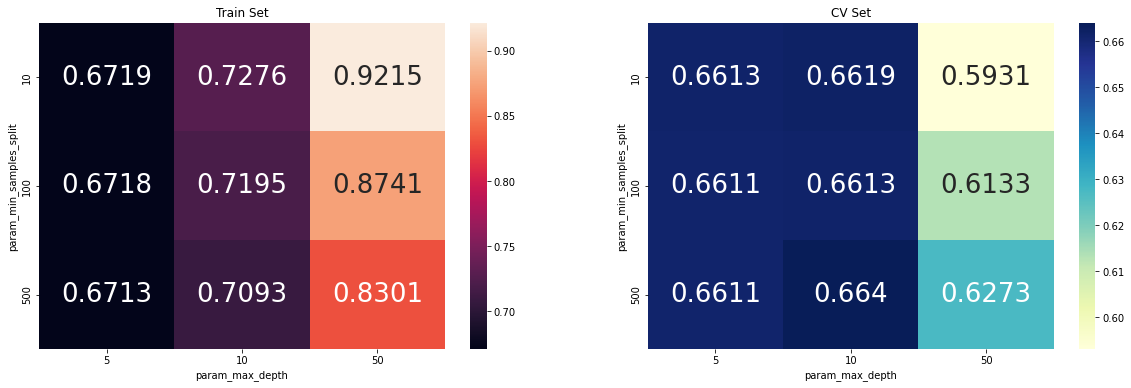

In [52]:
max_scores2 = pd.DataFrame(clf2.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores2.mean_train_score, annot = True, fmt='.4g', ax=ax[0],annot_kws={"size": 26})
sns.heatmap(max_scores2.mean_test_score, annot = True, fmt='.4g', ax=ax[1],annot_kws={"size": 26},cmap="YlGnBu")
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [53]:
clf2.cv_results_['mean_fit_time']

array([ 2.0792892 ,  2.08298969,  2.05806343,  6.9025778 ,  6.12602599,
        4.9476107 , 46.15959891, 35.43583385, 24.41961106])

### CASE 1: Find the best hyper parameter which will give the maximum AUC value using k-fold cross validation(use gridsearch cv or randomsearch cv)

**Using GridSearchCV**

**CASE 1: ROC curve**

In [54]:
clf2.cv_results_

{'mean_fit_time': array([ 2.0792892 ,  2.08298969,  2.05806343,  6.9025778 ,  6.12602599,
         4.9476107 , 46.15959891, 35.43583385, 24.41961106]),
 'std_fit_time': array([0.01100434, 0.05460123, 0.09033967, 0.49233091, 0.27312708,
        0.16000757, 1.55550029, 1.78311601, 2.60962174]),
 'mean_score_time': array([0.02971458, 0.02908405, 0.03381554, 0.0424482 , 0.03310402,
        0.03504244, 0.03829225, 0.03177691, 0.03434602]),
 'std_score_time': array([0.00045533, 0.00046932, 0.00315792, 0.0135969 , 0.00046115,
        0.00169753, 0.00114085, 0.0045748 , 0.00443431]),
 'param_max_depth': masked_array(data=[5, 5, 5, 10, 10, 10, 50, 50, 50],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[10, 100, 500, 10, 100, 500, 10, 100, 500],
              mask=[False, False, False, False, False, False, False, False,
                    Fa

**CASE1: ROC_CURVE**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning:

The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.



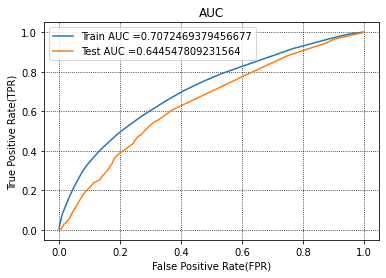

In [55]:
y_train_pred=clf2.predict_proba(X_train_BoW_merge)[:,1]
predictions_train_set2=clf2.predict(X_train_BoW_merge)

y_test_pred=clf2.predict_proba(X_test_BoW_merge)[:,1]
predictions_test_set2=clf2.predict(X_test_BoW_merge)


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train_case1, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test_case1, y_test_pred)

ax = plt.subplot()

auc_set2_train=auc(train_fpr, train_tpr)
auc_set2_test=auc(test_fpr, test_tpr)
case1_aucTest = auc_set2_test

ax.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
ax.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(b=True, which='major', color='k', linestyle=':')
ax.set_facecolor("white")
plt.show()

**CASE 1: confusion matrix**

In [56]:
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)

    return predictions

the maximum value of tpr*(1-fpr) 0.42426558792082825 for threshold 0.491
[[ 8610  4534]
 [26149 48071]]
the maximum value of tpr*(1-fpr) 0.42426558792082825 for threshold 0.491


<AxesSubplot:>

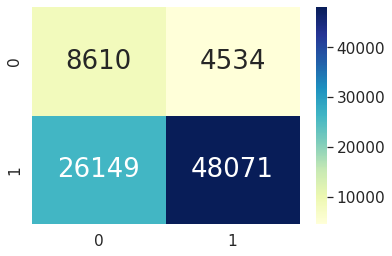

In [57]:
print(confusion_matrix(y_train_case1, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))

conf_matr_df_train_case1 = pd.DataFrame(confusion_matrix(y_train_case1, predict(y_train_pred, tr_thresholds,train_fpr, train_tpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_case1, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

the maximum value of tpr*(1-fpr) 0.42426558792082825 for threshold 0.491
[[2507  874]
 [9757 8703]]
the maximum value of tpr*(1-fpr) 0.42426558792082825 for threshold 0.491


<AxesSubplot:>

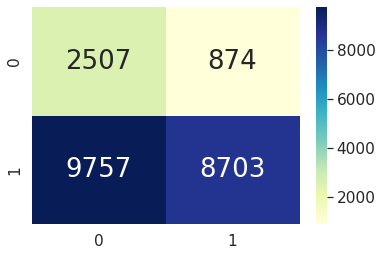

In [58]:
print(confusion_matrix(y_test_case1, predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)))

conf_matr_df_train_case2 = pd.DataFrame(confusion_matrix(y_test_case1, predict(y_test_pred, tr_thresholds,train_fpr, train_tpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_case2, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

### GridSearchCV
## CASE2: Perform hyper parameter tuning:
Assign (best `depth` in range [5, 10, 50], and the best `min_samples_split` in range [10, 100, 500])

In [59]:
dt_case1 = DecisionTreeClassifier(class_weight='balanced')
parameters = {'max_depth':[5, 10, 50],'min_samples_split':[10, 100, 500]}
clf2 = GridSearchCV(dt_case1, parameters, cv= 3, scoring='roc_auc',verbose=1,return_train_score=True,n_jobs=-1)

clf2.fit(X_train_TF_IDF_merge,y_train_case2)
train_auc= clf2.cv_results_['mean_train_score']
train_auc_std= clf2.cv_results_['std_train_score']
cv_auc = clf2.cv_results_['mean_test_score']
cv_auc_std= clf2.cv_results_['std_test_score']
bestMaxDepth_2=clf2.best_params_['max_depth']
bestMinSampleSplit_2=clf2.best_params_['min_samples_split']
bestScore_2=clf2.best_score_
print("BEST MAX DEPTH: ",clf2.best_params_['max_depth']," BEST SCORE: ",clf2.best_score_,"BEST MIN SAMPLE SPLIT: ",clf2.best_params_['min_samples_split'])

Fitting 3 folds for each of 9 candidates, totalling 27 fits
BEST MAX DEPTH:  5  BEST SCORE:  0.6585303222627763 BEST MIN SAMPLE SPLIT:  10


**CASE 2 : HEAT MAPS**

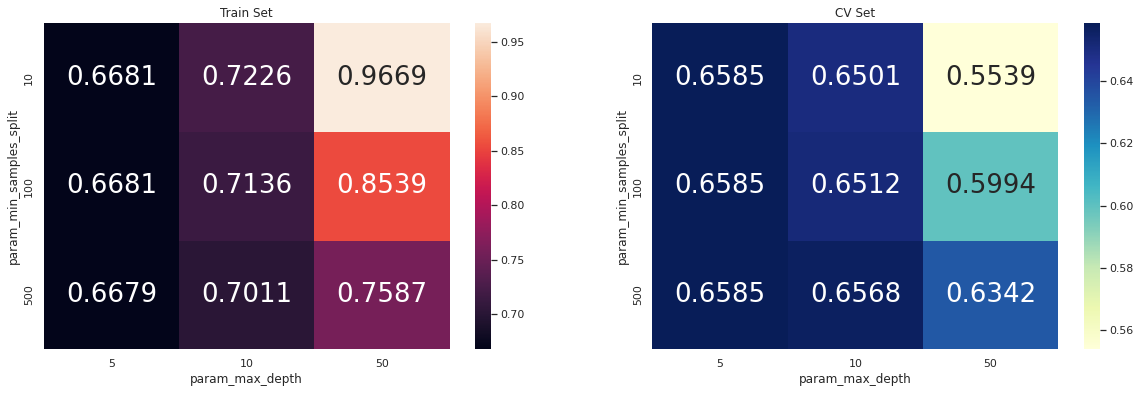

In [60]:
sns.set()
max_scores2 = pd.DataFrame(clf2.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores2.mean_train_score, annot = True, fmt='.4g', ax=ax[0],annot_kws={"size": 26})
sns.heatmap(max_scores2.mean_test_score, annot = True, fmt='.4g', ax=ax[1],annot_kws={"size": 26},cmap="YlGnBu")
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [61]:
clf2.cv_results_['mean_fit_time']

array([ 0.46591997,  0.46464101,  0.46215947,  1.57584469,  1.43573984,
        1.18366114, 10.04119841,  6.96857746,  3.68491316])

**CASE 2 : RESULT**

In [62]:
clf2.cv_results_

{'mean_fit_time': array([ 0.46591997,  0.46464101,  0.46215947,  1.57584469,  1.43573984,
         1.18366114, 10.04119841,  6.96857746,  3.68491316]),
 'std_fit_time': array([0.00430179, 0.01101556, 0.00656964, 0.00659629, 0.01668259,
        0.03191234, 0.24320281, 0.42512506, 0.4523302 ]),
 'mean_score_time': array([0.01935005, 0.01962082, 0.01854865, 0.02053658, 0.02022719,
        0.02037009, 0.02574261, 0.02268616, 0.02118746]),
 'std_score_time': array([4.37000552e-04, 4.69097116e-04, 3.08619955e-04, 2.20510965e-04,
        8.00705528e-05, 1.38206083e-03, 6.73651750e-04, 2.85345546e-03,
        3.42206465e-03]),
 'param_max_depth': masked_array(data=[5, 5, 5, 10, 10, 10, 50, 50, 50],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[10, 100, 500, 10, 100, 500, 10, 100, 500],
              mask=[False, False, False, False, False,

**CASE 2 : ROC CURVE**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning:

The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.



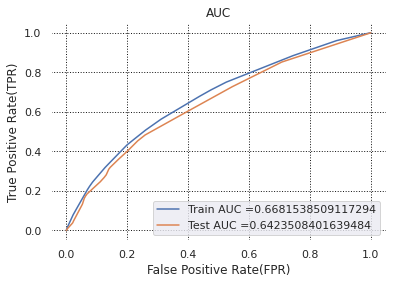

In [63]:
y_train_pred=clf2.predict_proba(X_train_TF_IDF_merge)[:,1]
predictions_train_set2=clf2.predict(X_train_TF_IDF_merge)

y_test_pred=clf2.predict_proba(X_test_TF_IDF_merge)[:,1]
predictions_test_set2=clf2.predict(X_test_TF_IDF_merge)


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train_case2, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test_case2, y_test_pred)

ax = plt.subplot()

auc_set2_train=auc(train_fpr, train_tpr)
auc_set2_test=auc(test_fpr, test_tpr)


ax.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
ax.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(b=True, which='major', color='k', linestyle=':')
ax.set_facecolor("white")
plt.show()

**CASE 2 : CONFUSION MATRIX**

Train Data

the maximum value of tpr*(1-fpr) 0.38757967371669655 for threshold 0.479
[[ 9053  4118]
 [32357 41836]]
the maximum value of tpr*(1-fpr) 0.38757967371669655 for threshold 0.479


<AxesSubplot:>

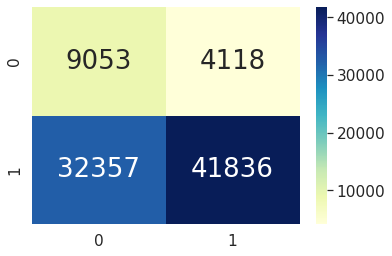

In [64]:
print(confusion_matrix(y_train_case2, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))

conf_matr_df_train_case2 = pd.DataFrame(confusion_matrix(y_train_case2, predict(y_train_pred, tr_thresholds,train_fpr, train_tpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_case2, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

Test Data

the maximum value of tpr*(1-fpr) 0.38757967371669655 for threshold 0.479
[[ 2671   683]
 [10990  7497]]
the maximum value of tpr*(1-fpr) 0.38757967371669655 for threshold 0.479


<AxesSubplot:>

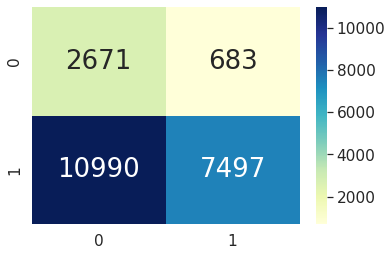

In [65]:
print(confusion_matrix(y_test_case2, predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)))

conf_matr_df_train_case2 = pd.DataFrame(confusion_matrix(y_test_case2, predict(y_test_pred, tr_thresholds,train_fpr, train_tpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_case2, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

#2. Performance Evaluation

Print test Accuracy, Confusion Matrix for case 1 and case 2 separately.

**CASE 1: confusion matrix**

In [66]:
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)

    return predictions

the maximum value of tpr*(1-fpr) 0.38757967371669655 for threshold 0.479
[[ 6265  6879]
 [35145 39075]]
the maximum value of tpr*(1-fpr) 0.38757967371669655 for threshold 0.479


<AxesSubplot:>

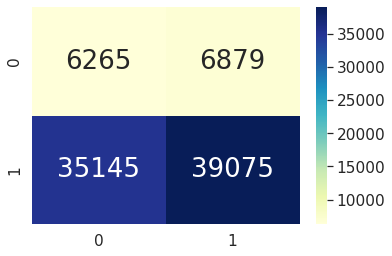

In [67]:
print(confusion_matrix(y_train_case1, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))

conf_matr_df_train_case1 = pd.DataFrame(confusion_matrix(y_train_case1, predict(y_train_pred, tr_thresholds,train_fpr, train_tpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_case1, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

the maximum value of tpr*(1-fpr) 0.38757967371669655 for threshold 0.479
[[ 2119  1262]
 [11542  6918]]
the maximum value of tpr*(1-fpr) 0.38757967371669655 for threshold 0.479


<AxesSubplot:>

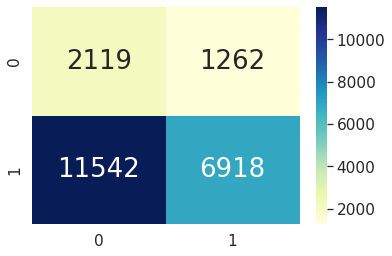

In [68]:
print(confusion_matrix(y_test_case1, predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)))

conf_matr_df_train_case2 = pd.DataFrame(confusion_matrix(y_test_case1, predict(y_test_pred, tr_thresholds,train_fpr, train_tpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_case2, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

**CASE 2: confusion matrix**

In [69]:
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)

    return predictions

the maximum value of tpr*(1-fpr) 0.38757967371669655 for threshold 0.479
[[ 9053  4118]
 [32357 41836]]
the maximum value of tpr*(1-fpr) 0.38757967371669655 for threshold 0.479


<AxesSubplot:>

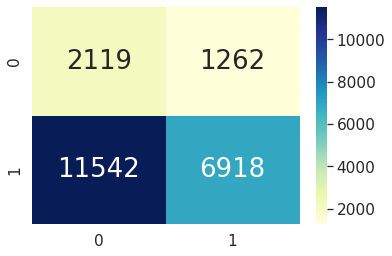

In [70]:
print(confusion_matrix(y_train_case2, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))

conf_matr_df_train_case1 = pd.DataFrame(confusion_matrix(y_train_case2, predict(y_train_pred, tr_thresholds,train_fpr, train_tpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_case2, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

the maximum value of tpr*(1-fpr) 0.38757967371669655 for threshold 0.479
[[ 2671   683]
 [10990  7497]]
the maximum value of tpr*(1-fpr) 0.38757967371669655 for threshold 0.479


<AxesSubplot:>

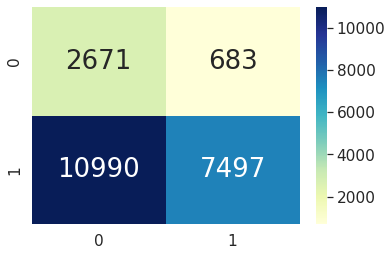

In [71]:
print(confusion_matrix(y_test_case2, predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)))

conf_matr_df_train_case2 = pd.DataFrame(confusion_matrix(y_test_case2, predict(y_test_pred, tr_thresholds,train_fpr, train_tpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_case2, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

In [72]:
print("Vectoriser BoW \nHyper parameter-max depth: " + str(case1_maxDepth) + "\nTest AUC:" + str(case1_aucTest))

Vectoriser BoW 
Hyper parameter-max depth: 10
Test AUC:0.644547809231564


In [73]:
print("Vectoriser TF-IDF \nHyper parameter-max depth: " + str(clf2.best_params_['max_depth']) + "\nTest AUC:" + str(auc_set2_test))

Vectoriser TF-IDF 
Hyper parameter-max depth: 5
Test AUC:0.6423508401639484
